In [3]:
from exprel.dataset.hasoc_dataset import HasocDataset
from exprel.models.utils import tree_to_code
from dotenv import load_dotenv 
import pandas as pd
load_dotenv()

True

In [4]:
df = pd.read_csv("/home/kovacs/projects/exp-relation-extraction/data/hasoc_2020_en_train_new_normalized.csv", delimiter="\t")
data = HasocDataset(df)

2021-08-13 09:09:07 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | ewt       |
| pos       | ewt       |
| lemma     | ewt       |
| depparse  | ewt       |
| sentiment | sstplus   |
| ner       | ontonotes |

/home/kovacs/miniconda3/envs/rel/lib/python3.9/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 6050). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0
2021-08-13 09:09:07 INFO: Use device: cpu
2021-08-13 09:09:08 INFO: Loading: tokenize
2021-08-13 09:09:08 INFO: Loading: pos
2021-08-13 09:09:09 INFO: Lo

In [5]:
df = data.to_dataframe()

In [6]:
import pandas as pd
pd.options.display.max_colwidth = 200

In [7]:
df

,hasoc_id,original_text,preprocessed_text,task1,task2,task1_id,task2_id,graph
0,0,"hate wen females hit ah nigga with tht bro 😂😂, I'm tryna make u my la sweety , fuck ah bro","hate wen females hit ah nigga with tht bro 😂😂, I'm tryna make u my la sweety , fuck ah bro",HOF,PRFN,0,3,None
1,1,RT [USER]: When you're from the Bay but you're really a NY nigga at heart. W/ [USER] [URL],RT [USER]: When you're from the Bay but you're really a NY nigga at heart. W/ [USER] [URL],HOF,PRFN,0,3,None
2,2,"RT [USER]: Dear Democrats: The American people aren't stupid, they know what spying is and no amount of gaslighting will change th...","RT [USER]: Dear Democrats: The American people aren't stupid, they know what spying is and no amount of gaslighting will change th...",NOT,NONE,1,1,None
3,3,RT [USER]: He ain't on drugs he just bored. I be doing the same shit when I'm bored 😂 [URL],RT [USER]: He ain't on drugs he just bored. I be doing the same shit when I'm bored 😂 [URL],HOF,PRFN,0,3,None
4,4,"RT [USER]: Summer '19 I'm coming for you ! No boring shit ! Beach days, road trips, kickbacks and HOT DAYS ! I'm ready I'm ready I'm...","RT [USER]: Summer '19 I'm coming for you ! No boring shit ! Beach days, road trips, kickbacks and HOT DAYS ! I'm ready I'm ready I'm...",NOT,NONE,1,1,None
...,...,...,...,...,...,...,...,...
3703,3703,RT [USER]: TONIGHT TONIGHT TONIGHT Catch me doing some stand-up at the Floetic Fusion Showcase in NW DC ✨ [URL] ht...,RT [USER]: TONIGHT TONIGHT TONIGHT Catch me doing some stand-up at the Floetic Fusion Showcase in NW DC ✨ [URL] ht...,NOT,NONE,1,1,None
3704,3704,RT [USER]: Eat my ass,RT [USER]: Eat my ass,HOF,PRFN,0,3,None
3705,3705,RT [USER]: BREAKING NEWS: TPA is about to get even better! In the plans for 2020 - 👩‍👦 Mother's Nursing Rooms 💧 Water Bottle Filling St...,RT [USER]: BREAKING NEWS: TPA is about to get even better! In the plans for 2020 - 👩‍👦 Mother's Nursing Rooms 💧 Water Bottle Filling St...,NOT,NONE,1,1,None
3706,3706,RT [USER]: It's been a hr FUCK THAT GAME 👿👿 [URL],RT [USER]: It's been a hr FUCK THAT GAME 👿👿 [URL],HOF,PRFN,0,3,None


In [6]:
df.iloc[3705].preprocessed_text

"RT BREAKING NEWS: TPA is about to get even better! In the plans for 2020 - 👩\u200d👦 Mother's Nursing Rooms 💧 Water Bottle Filling St…"

In [8]:
from exprel.feature_extractor.extract import FeatureExtractor
from exprel.models.model import GraphModel

extractor = FeatureExtractor(lang="en", cache_fn="en_nlp_cache")
model = GraphModel()

In [9]:
data.load_graphs("/home/kovacs/projects/exp-relation-extraction/notebooks/graphs/hasoc2020_train_amr.pickle")
#graphs = data.parse_graphs(extractor, format="fourlang")

In [10]:
df = data.to_dataframe()

In [11]:
df.iloc[34].preprocessed_text

'RT [USER]: oree oru Family Entertainer Movie taannn By - civaa caar 😍🙏 Total Record Uhm Close 😉💪 Record Breaking visvaacm 😎🔥 https:...'

In [12]:
import pandas as pd

ids = pd.to_numeric(df.index).tolist()
sentences = df.preprocessed_text.tolist()
labels = df.task1_id.tolist()
postprocessed_graphs = df.graph.tolist()

In [13]:
from tqdm import tqdm

for ind, graph, label in tqdm(zip(ids, postprocessed_graphs, labels)):
    model.featurize_sen_graph(ind, graph, label, 2)

3708it [00:57, 64.37it/s]


In [14]:
model.vocab_size

124204

In [15]:
feature_graphs = model.get_feature_graphs()

In [16]:
model.select_n_best(1500)

In [17]:
X, Y = model.get_x_y(df.task1)

In [18]:
from sklearn.model_selection import train_test_split as split

tr_data,tst_data,tr_labels,tst_labels = split(X,Y, test_size=0.2, random_state=1234)

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
#clf = LogisticRegression(random_state=0).fit(tr_data, tr_labels)
clf = OneVsRestClassifier(RandomForestClassifier(random_state=0, max_depth=10)).fit(tr_data, tr_labels)

In [40]:
tr_labels.unique()

AttributeError: 'numpy.ndarray' object has no attribute 'unique'

In [20]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
keys = model.label_vocab.word_to_id.keys()
labels_to_result = {}
lr_pred = clf.predict(tr_data)
#prf = precision_recall_fscore_support(tst_labels, lr_pred, average=None)
print(classification_report(tr_labels, lr_pred, target_names=keys, output_dict=False))

              precision    recall  f1-score   support

         HOF       0.97      0.75      0.84      1498
         NOT       0.79      0.97      0.87      1468

    accuracy                           0.86      2966
   macro avg       0.88      0.86      0.86      2966
weighted avg       0.88      0.86      0.86      2966



In [21]:
feature_graph_strings = model.get_feature_graph_strings()

In [22]:
import re

def d_clean(string):
    s = string
    for c in '\\=@-,\'".!:;<>/{}[]()#^?':
        s = s.replace(c, '_')
    s = s.replace('$', '_dollars')
    s = s.replace('%', '_percent')
    s = s.replace('|', ' ')
    s = s.replace('*', ' ')
    if s == '#':
        s = '_number'
    keywords = ("graph", "node", "strict", "edge")
    if re.match('^[0-9]', s) or s in keywords:
        s = "X" + s
        
    if not s:
        return "None"
    return s

def to_dots(graphs, marked_nodes=set(), integ=False):
    lines = [u'digraph finite_state_machine {', '\tdpi=70;']
    # lines.append('\tordering=out;')
    # sorting everything to make the process deterministic
    for i, graph in enumerate(graphs):
        s = "subgraph cluster_" + chr(ord('@')+i+1) + " {"
        node_lines = []

        node_lines.append(s)
        node_to_name = {}
        for node, n_data in graph.nodes(data=True):
            if integ:
                d_node = d_clean(str(node))
            else:    
                d_node = d_clean(n_data["name"])
            printname = d_node
            node_to_name[node] = printname
            if 'expanded' in n_data and n_data['expanded'] and printname in marked_nodes:
                node_line = u'\t{0} [shape = circle, label = "{1}", \
                        style=filled, fillcolor=purple];'.format(
                    d_node, printname).replace('-', '_')
            elif 'expanded' in n_data and n_data['expanded']:
                node_line = u'\t{0} [shape = circle, label = "{1}", \
                        style="filled"];'.format(
                    d_node, printname).replace('-', '_')
            elif 'fourlang' in n_data and n_data['fourlang']:
                node_line = u'\t{0} [shape = circle, label = "{1}", \
                        style="filled", fillcolor=red];'.format(
                    d_node, printname).replace('-', '_')
            elif 'substituted' in n_data and n_data['substituted']:
                node_line = u'\t{0} [shape = circle, label = "{1}", \
                        style="filled"];'.format(
                    d_node, printname).replace('-', '_')
            elif printname in marked_nodes:
                node_line = u'\t{0} [shape = circle, label = "{1}", style=filled, fillcolor=lightblue];'.format(
                    d_node, printname).replace('-', '_')
            else:
                node_line = u'\t{0} [shape = circle, label = "{1}"];'.format(
                    d_node, printname).replace('-', '_')
            node_lines.append(node_line)
        lines += sorted(node_lines)

        edge_lines = []
        for u, v, edata in graph.edges(data=True):
            if 'color' in edata:
                d_node1 = node_to_name[u]
                d_node2 = node_to_name[v]
                edge_lines.append(
                    u'\t{0} -> {1} [ label = "{2}" ];'.format(d_node1, d_node2, edata['color']))

        lines += sorted(edge_lines)
        lines.append('}')
    lines.append('}')
    return u'\n'.join(lines)

def to_dot(graph, marked_nodes=set(), integ=False):
    lines = [u'digraph finite_state_machine {', '\tdpi=70;']
    # lines.append('\tordering=out;')
    # sorting everything to make the process deterministic
    node_lines = []
    node_to_name = {}
    for node, n_data in graph.nodes(data=True):
        if integ:
            d_node = d_clean(str(node))
        else:    
            d_node = d_clean(n_data["name"])
        printname = d_node
        node_to_name[node] = printname
        if 'expanded' in n_data and n_data['expanded'] and printname in marked_nodes:
            node_line = u'\t{0} [shape = circle, label = "{1}", \
                    style=filled, fillcolor=purple];'.format(
                d_node, printname).replace('-', '_')
        elif 'expanded' in n_data and n_data['expanded']:
            node_line = u'\t{0} [shape = circle, label = "{1}", \
                    style="filled"];'.format(
                d_node, printname).replace('-', '_')
        elif 'fourlang' in n_data and n_data['fourlang']:
            node_line = u'\t{0} [shape = circle, label = "{1}", \
                    style="filled", fillcolor=red];'.format(
                d_node, printname).replace('-', '_')
        elif 'substituted' in n_data and n_data['substituted']:
            node_line = u'\t{0} [shape = circle, label = "{1}", \
                    style="filled"];'.format(
                d_node, printname).replace('-', '_')
        elif printname in marked_nodes:
            node_line = u'\t{0} [shape = circle, label = "{1}", style=filled, fillcolor=lightblue];'.format(
                d_node, printname).replace('-', '_')
        else:
            node_line = u'\t{0} [shape = circle, label = "{1}"];'.format(
                d_node, printname).replace('-', '_')
        node_lines.append(node_line)
    lines += sorted(node_lines)

    edge_lines = []
    for u, v, edata in graph.edges(data=True):
        if 'color' in edata:
            d_node1 = node_to_name[u]
            d_node2 = node_to_name[v]
            edge_lines.append(
                u'\t{0} -> {1} [ label = "{2}" ];'.format(d_node1, d_node2, edata['color']))

    lines += sorted(edge_lines)
    lines.append('}')
    return u'\n'.join(lines)

RT [USER]: Dear Democrats: The American people aren't stupid, they know what spying is and no amount of gaslighting will change th...


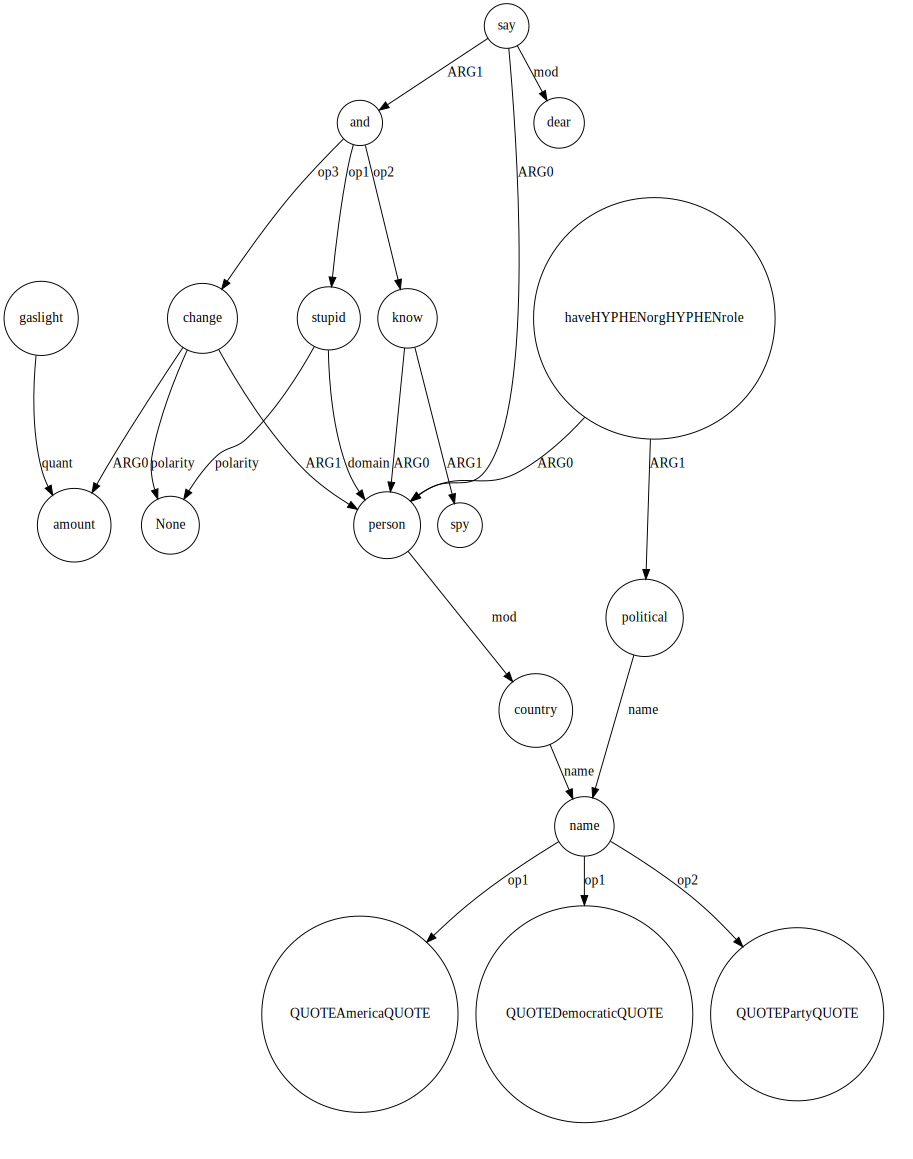

In [23]:
from graphviz import Digraph
from graphviz import Source

i = 2
print(sentences[i])
Source(to_dot(postprocessed_graphs[i]))

In [23]:
import eli5

In [24]:
weights_df = eli5.explain_weights_df(clf)

In [25]:
from collections import defaultdict
features = defaultdict(list)

for target in weights_df.target.unique():
    targeted_df = weights_df[weights_df.target == target]
    most_important_weights = targeted_df.iloc[:5].feature.str.strip("x").tolist()
    for i in most_important_weights:
        if i != "<BIAS>":
            g_nx = feature_graphs[model.inverse_relabel[int(i)]]
            #if len(g_nx.edges()):
            g = feature_graph_strings[model.inverse_relabel[int(i)]]
            features[list(keys)[int(target)]].append(([g], [], model.label_vocab.id_to_word[int(target)]))

In [36]:
#RandomForest
from collections import defaultdict
features = defaultdict(list)

for j, est in enumerate(clf.estimators_):
    weights_df = eli5.explain_weights_df(est)
    most_important_weights = weights_df.iloc[:5].feature.str.strip("x").tolist()
    for i in most_important_weights:
        if i != "<BIAS>":
            g_nx = feature_graphs[model.inverse_relabel[int(i)]]
            #if len(g_nx.edges()):
            g = feature_graph_strings[model.inverse_relabel[int(i)]]
            features[list(keys)[j]].append(([g], [], model.label_vocab.id_to_word[j]))

In [34]:
features

defaultdict(list,
            {'HOF': [(['(u_12 / fuck)'], [], 'HOF'),
              (['(u_46 / shit)'], [], 'HOF'),
              (['(u_13 / expressive)'], [], 'HOF'),
              (['(u_94 / ass)'], [], 'HOF'),
              (['(u_85 / fucking)'], [], 'HOF')]})

In [41]:
import json

with open("features_task1.json", "w+") as f:
    json.dump(features, f)

In [24]:
train, val = split(df, test_size=0.2, random_state=1234) 

In [25]:
train = train.rename(columns={'preprocessed_text': 'sentence', 'task1': 'label'})
val = val.rename(columns={'preprocessed_text': 'sentence', 'task1': 'label'})

In [26]:
val

,hasoc_id,original_text,sentence,label,task2,task1_id,task2_id,graph
953,953,RT [USER]: TAEHYUNG'S ASS I CANT BREATHEIERJDJ [URL],RT [USER]: TAEHYUNG'S ASS I CANT BREATHEIERJDJ [URL],HOF,OFFN,0,2,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)"
63,63,"[USER] My mom told me once umuntu wahamba, they must never come back cos you don't know who you're dealing with, babuya beshintshile 🤞🏽","[USER] My mom told me once umuntu wahamba, they must never come back cos you don't know who you're dealing with, babuya beshintshile 🤞🏽",NOT,NONE,1,1,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17)"
2138,2138,"Don't miss out on attending Destination BootCamp®! This 2.5 day workshop can help you learn how to work ""on"" your b... [URL]","Don't miss out on attending Destination BootCamp®! This 2.5 day workshop can help you learn how to work ""on"" your b... [URL]",NOT,NONE,1,1,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21)"
570,570,This is why you're jobless,This is why you're jobless,NOT,NONE,1,1,"(0, 1, 2, 3)"
3622,3622,RT [USER]: Father of Colorado school shooter Alec McKinney is serial felon and illegal immigrant 💥 So is this why there is no covera...,RT [USER]: Father of Colorado school shooter Alec McKinney is serial felon and illegal immigrant 💥 So is this why there is no covera...,HOF,HATE,0,0,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22)"
...,...,...,...,...,...,...,...,...
1144,1144,I'm definitely not gon be doin this shit long ‼,I'm definitely not gon be doin this shit long ‼,HOF,PRFN,0,3,"(0, 1, 2, 3, 4, 5, 6)"
204,204,RT [USER]: *reminds myself he's not worth my tears* Fuck that idiot.,RT [USER]: *reminds myself he's not worth my tears* Fuck that idiot.,HOF,PRFN,0,3,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)"
3458,3458,[USER] Bern are trying to keep something from the ppl like you going to jail and want to be able to vote while yo... [URL],[USER] Bern are trying to keep something from the ppl like you going to jail and want to be able to vote while yo... [URL],NOT,NONE,1,1,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15)"
1225,1225,RT [USER]: ah shit here we go again [URL],RT [USER]: ah shit here we go again [URL],HOF,PRFN,0,3,"(0, 1, 2, 3, 4, 5, 6, 7, 8)"


In [27]:
train.to_pickle("train_dataset")
val.to_pickle("val_dataset")